<img src = "https://www.hh.se/images/18.4ad3d9ee1656d0f05ef643a3/1550842090193/hh-logo.svg" width = "150" align = "left">  
<br/>
<br/>
    
# Python, a Gateway to Machine Learning

<!--
<center> <img src = "https://www.link.cs.cmu.edu/splay/tree5.jpg" width = "200"></center>
<center><i>A Self-Adjusting Search Tree</i></center>
<center><i>by Jorge Stolfi</i></center>
<br>
-->

## Project: Asking questions to data using Pandas and NumPy

### Introduction

This is a Juypyter notebook that contains text and links for the last assignment of the course. The assignmement is designed as a project: an open ended task that allows you to apply what you learned about Python including Pandas and NumPy to ask questions and find answers to questions of social relevance. 

The topics you can choose are
*  climate change and its consequences,
* health care and its consequences or
* education and its consequences


On completion of your project this notebook should include the following parts:

* An introduction to what it is that you want to explore. 

* A description of the data sets that you use, including the sources and what kind of data they include.

* A section for loading the data (possibly from several data sets) including  code to explore and possibly clean or reorganize the data so that you can use it for the rest of the problem.
      
* A section that asks one or more questions that can be answered by exploring, combining, transforming the data.

      
* A section with programs for the questions.


* A section with an analysis of the results of your programs to explain the answers to your questions.

In each part there can be several cells, both code and markdown. But each section has to start with a markdown cell including at least the title of the section: you will find these cells with a little explanation alredy in the notebook.



This project is part of the examination of the course. There are instructions on how to submit, including deadlines and advice, in the Blackboard site for the course. Please follow these instructions. There you can also see what is needed in order to pass. 



#  Identify the risk factors of stroke

A stroke is a serious life-threatening medical condition that happens when the blood supply to part of the brain is cut off. So here in this project, we will try to visulize some key indicators that lead to stop the supply of blood in the body.The risk factors could be age , bmi(body mass index), lifestyle of the person and some other heart diseases problem the person has occured.
Can we say that age is related to the stroke? Can we analyse that older patients are more likely to suffer a stroke than a younger patient? A patient who already has hypertension problem has more chance of stroke.Can hypertension be one of the factor in stroke?

## Data sources

In this project we are using “stroke predication dataset” which is  a stroke prediction dataset from Kaggle and here is the link of this dataset https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset .In this dataset the  data is stored and displayed in  a table format(a xls file).It contains 5110 observations (rows) with 12 attributes (columns). Each observation corresponds to one patient, and the attributes are variables about the health status of each patient.

In [197]:
## Data extraction

import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

stroke= pd.read_csv('/home/pinki/Desktop/healthcare-dataset-stroke-data.xls')
stroke.sample(10)



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4979,23757,Female,60.0,0,0,No,Private,Urban,105.48,28.4,Unknown,0
3599,44886,Male,69.0,1,0,Yes,Self-employed,Rural,236.79,35.7,formerly smoked,0
3792,44259,Female,74.0,0,0,Yes,Private,Urban,130.37,26.3,Unknown,0
193,69112,Male,68.0,1,1,Yes,Private,Rural,271.74,31.1,smokes,1
2646,63337,Female,42.0,0,0,Yes,Private,Rural,69.99,46.0,smokes,0
3744,43734,Male,15.0,0,0,No,Private,Rural,122.25,21.0,never smoked,0
4715,38642,Male,55.0,0,0,Yes,Private,Urban,63.56,29.9,Unknown,0
3508,65154,Female,30.0,0,0,Yes,Private,Urban,112.19,53.4,never smoked,0
2995,4750,Male,78.0,0,0,Yes,Private,Urban,85.03,26.1,formerly smoked,0
3654,24068,Female,32.0,0,0,Yes,Private,Urban,85.91,22.1,Unknown,0


In this dataset, the categorical variables are id, gender, hypertension (yes/no), heart_disease (yes/no), marital status, work type (government job, never worked, private, self-employer), residence_type (urban, rural), smoking_ status (formerly smoked, never smoked, smokes), and stroke history. As for quantitative variables we have one’s age, BMI and average glucose level.

When we see 12 attributes we can conclude some information about each coloumn

(1)id: unique identifier for each person
(2)gender: male, female, or other
(3)age: 0-82 years old
(4)hypertension: 0 if the person doesn’t have hypertension, 1 if the person has hypertension
(5)heart_disease: 0 if the person doesn’t have any heart diesease, 1 if the person has a heart disease
(6)ever_married: Yes or No
(7)work_type: children, govt_job, never_worked, private, or self-employed
(8)residence_type: urban or rural
(9)avg_glucose_level: average glucose level in blood; range: 55-272
(10)bmi: body mass index; range: 10-98
(11)smoking_status: formerly smoked, never smoked, smokes, unknown
(12)stroke: 0 if person never had a stroke, 1 if the person suffered a stroke before

Now we will check if any coloumn has null values.For this perpose we will use info on the dataframe.

In [199]:
stroke.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


One thing we notice, there is a coloumn called "bmi" which do not seem to contain data in all rows.Because the bmi column has 4909 entries which means some entries are missing and bmi could be a vital variable with respect to our analysis.Here we will findout how many values are missing in 'bmi' and we will replace these missing values with mean of age and bmi to analyse how these values affect the dataframe.
Let's count how many values are missing in bmi coloumn.

Lets count hom many values are missing in bmi column.

In [200]:
s = stroke.isnull().sum()     # sum of all null values
result = pd.concat([s],1)           #concating s dataframe with result dataframe
result.columns = ["missing_count"]   #  adding one more coloumn called missing_count in result data frame.
print (result)

                   missing_count
id                             0
gender                         0
age                            0
hypertension                   0
heart_disease                  0
ever_married                   0
work_type                      0
Residence_type                 0
avg_glucose_level              0
bmi                          201
smoking_status                 0
stroke                         0


/tmp/ipykernel_5437/4155609355.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  result = pd.concat([s],1)           #concating s dataframe with result dataframe


Here we can see that there is total 201 values are missing in 'bmi' coloumn.201 missing values are less than 5%(201/5110=3.9) of the total entries in the column, so it might be worth replacing the missing values with a mean value .We can assume that the mean values will not significantly affect the results after replace with missing values.Lets create two new coloumn namely bmi_mean and age_mean. Both column have bmi values where missing values are replaced by bmi mean and age mean respectively.

In [201]:
stroke['bmi_mean'] = stroke['bmi'].fillna(stroke['bmi'].mean())
#print(stroke)
stroke['age_mean'] = stroke['bmi'].fillna(stroke['age'].mean())
print(stroke)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

We have created two coloumns above, bmi_mean and age_mean. Now we will draw a boxplot to check how mean values are affecting the bmi column. Boxplot will tell us which null replacement will give more outliers. The one with less outliers will be choosen and if both boxplot has same number of outliers we can choose any one.

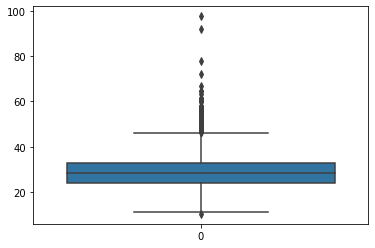

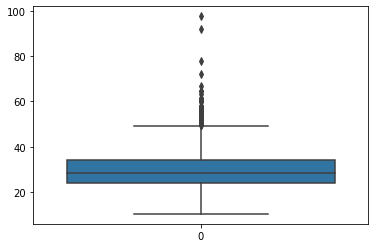

In [202]:
sns.boxplot(data=[stroke['bmi_mean']])
plt.show()
sns.boxplot(data=[stroke['age_mean']])
plt.show()


From above  boxplot we can see that both coloumn have same outliers and it will not effect out result because they are less in numbers. 

In [ ]:
Now we can replace bmi missing values by mean of bmi using np.nan

In [203]:
stroke['bmi'].replace(np.nan, value=stroke['bmi'].mean() ,inplace=True) 
print(stroke)                                                            

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-

Now we will check if bmi column missing values have been replaced or not

In [235]:
s = stroke.isnull().sum()     #create a new dataframe which is sum of all null values
result = pd.concat([s],axis=1)       #concate 's' dataframe with result dataframe 
result.columns = ["missing_count"]
print (result)

                          missing_count
id                                    0
gender                                0
age                                   0
hypertension                          0
heart_disease                         0
ever_married                          0
work_type                             0
Residence_type                        0
avg_glucose_level                     0
bmi                                   0
smoking_status                        0
stroke                                0
bmi_mean                              0
age_mean                              0
age_binned                            0
avg_glucose_level_binned              0
bmi_binned                            0


Questions

(1)Could it be a case that older patients have more chances of stroke?

(2) Can we say male patients get more stroke than female?

(3)A patient who already has hypertension problem has more chance of stroke.Can hypertension be one of the factor in stroke?

(4)We always say that smoking is injurious to health .Is it true in stroke too? Could we say that the person who smokes has more chances of stroke?

(5)Too much work load ends up in stress,can stroke also be caused by type of work ? 

(6)Do people living in the urban have more stroke?

## Programs


(1)Could it be a case that older patients have more chances of stroke?
Let' analyse the age coloumn. First we will findout which age group has more chances of stroke using boxplot function.
Boxplot is a graphical repsentation of numurical data through quartiles.Here x and y are axis and in data we"ll pass the data frame.

This dataset is about the pateients who are visiting the hospitals for the treatment of stroke or routine check up.Let's see which age group people are visiting the more  

In [242]:
agg_age_describe = {'age': ['describe']}
stroke.groupby(['gender']).agg(agg_age_describe).round(2)

age                                             
       describe                                             
          count   mean    std    min   25%   50%   75%   max
gender                                                      
Female   2994.0  43.76  21.97   0.08  27.0  44.0  61.0  82.0
Male     2115.0  42.48  23.48   0.08  22.0  46.0  61.0  82.0
Other       1.0  26.00    NaN  26.00  26.0  26.0  26.0  26.0

Above table shows that 75% male and female have 61 age and max age in this dataset is 82 for male and female.From this table we can say that after age of 60 people are visiting the hospital freqently.
If these people are visiting the hopital frequently then they must have some relation with stroke.Lets explore this with the help of boxplot.

<AxesSubplot:xlabel='stroke', ylabel='age'>

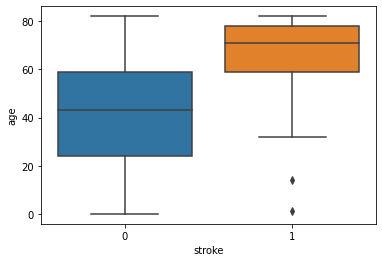

In [240]:
sns.boxplot(x='stroke',y='age',data=stroke)

Here the horizontal line represents the median age and  the mid-point of the data and it  also divides the box into two parts 
If we notice this boxplot carefully we can conclude that the patient who had stroke are in the age group of 60 to 80 .

At what age the stroke is increaing. This could be done by using FacetGdri.FacetGrid class helps in visualizing distribution of one variable as well as the relationship between multiple variables.


/home/pinki/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/pinki/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


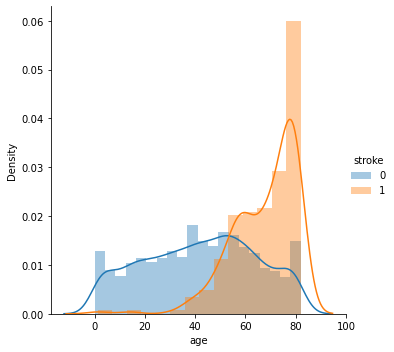

In [244]:
sns.FacetGrid(stroke,hue="stroke",height = 5).map(sns.distplot,"age").add_legend() #map() function is used to map values of Series according to "age" input .


Above plot represent that with advancing age the chances of stroke increases.But there is limited overlapping between the person who are  getting the stroke and who are not getting it.So stroke is related to age but the petient who is above 60.

(2)Can we say that male patients get more stroke than female?First we count how many persong got stroke.
here we will use value_counts()

In [207]:
stroke["stroke"].value_counts() #vale_counts() method counts the each unique value

0    4861
1     249
Name: stroke, dtype: int64

Above result clearly shows that 249 persons have got stroke.Are these person male or female or could be both? 
Here we will group by() and count() methods.
groupby method allows us to group our required data data and execute functions on these groups. Here we are the data of two coloumn and appluying the result on age coloumn.

In [208]:
gender_stroke = stroke.groupby(['gender', 'stroke'])['age'].count()
print(gender_stroke)
    

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: age, dtype: int64


141 Female patients got stroke out of 2994 female patients which is 4.7% and in case of male 108 male patients got stroke(approx 5%). So we can say that gender is not factor which could affect the stroke problem.

A patient who already has hypertension problem has more chance of stroke.Can hypertension be one of the factor in stroke? 

In [209]:
stroke.groupby(['gender','stroke'])["hypertension"].value_counts()

gender  stroke  hypertension
Female  0       0               2616
                1                237
        1       0                102
                1                 39
Male    0       0               1812
                1                195
        1       0                 81
                1                 27
Other   0       0                  1
Name: hypertension, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='hypertension'>

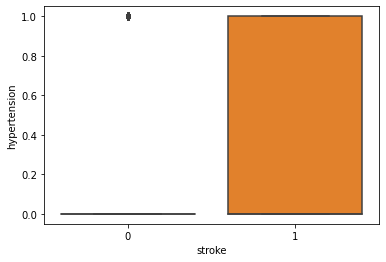

In [210]:
sns.boxplot(x='stroke',y='hypertension',data=stroke)

The above plot  and list clearly represent that the the patient who alreay had hypertension problem have
higher risk of stroke.So hypertension significantly affect the stroke.


Will those who  have not hypertension  problem be affected by work type,Age,heart disease and marriage status? Is there any relationship betwen these factors?


In [212]:
counts = stroke["ever_married"].value_counts()
percent= stroke["ever_married"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
stroke_conditions=pd.DataFrame({'counts': counts, 'Percent': percent})
print(stroke_conditions)

     counts Percent
Yes    3353   65.6%
No     1757   34.4%


<Figure size 432x288 with 0 Axes>

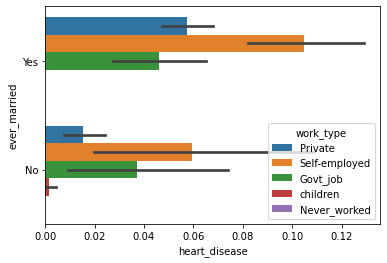

<Figure size 432x288 with 0 Axes>

In [213]:
sns.barplot(data=stroke[stroke["hypertension"]==0], x="heart_disease", y="ever_married",hue="work_type")
plt.figure()

Here we pass the data of hypertension coloumn  who have not hypertension problem.We got an interesting result that self employed  and private sector workers have high chance of getting stroke than private sector.Self emplpyed people take more stress of work due to which they  have high chance of stroke. 

Does High BMI(body mass index) cause stroke?Is there any relation between age and bmi?

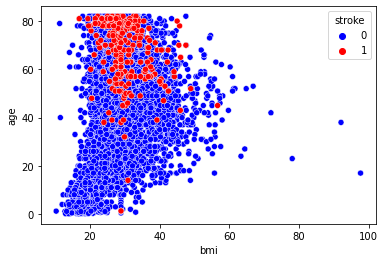

In [214]:
ax= sns.scatterplot(x="bmi", y="age", data=stroke[stroke['stroke'] == 0]
    ,hue="stroke",palette=['blue'], legend='full')
sns.scatterplot(x="bmi", y="age", data=stroke[stroke['stroke']==1]
    , hue="stroke", palette=['red']
    , legend='full')
plt.show()


From the above plot we can clearly see that when people attain an age of 40 or greater 
the chances of getting a stroke increases and after 60+ it tends to increase even more. Also, people
with a BMI of 25+ have shown a higher chances of encountering a stroke.
So,people with 40+ years and BMI of 25+ have a greater chances of encountering a stroke.

We always say that smoking is injurious to health.Is it true in stroke too? Could we say that the person who smokes has more chances of stroke?

In [215]:
stroke["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [216]:
stroke.groupby(['stroke'])["smoking_status"].value_counts()

stroke  smoking_status 
0       never smoked       1802
        Unknown            1497
        formerly smoked     815
        smokes              747
1       never smoked         90
        formerly smoked      70
        Unknown              47
        smokes               42
Name: smoking_status, dtype: int64

In total 90 persons got stroke but they never smoked and of those who smoked , only 40 persos got stroke. So we can't say that only people who smoke get stroke. 

Some people live in rural area and some people live in the city.Do people living in the urban have more chances of getting stroke?
We will use value_counts() fuction on residence_type coloumn and groupby the result to check how residence and stroke are releted to each other?

In [217]:
stroke["Residence_type"].value_counts() # value_counts counts the each unique value in residence_type column

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In value_counts() function  normalize set to True.  So It returns the relative frequency by dividing all
values by the sum of values. 
round() function round off the value upto one decimal.

In [218]:
counts = stroke["Residence_type"].value_counts()
percent = stroke["Residence_type"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
stroke_conditions=pd.DataFrame({'counts': counts, 'Percent': percent})

print(stroke_conditions)

       counts Percent
Urban    2596   50.8%
Rural    2514   49.2%


Both rural and urban people have same chance of getting stroke because they have approximately same percentage of stroke.
Now explore residence type with the hypertension. How both are related to each other ?

In [219]:
stroke.groupby(['hypertension', 'stroke'])["Residence_type"].value_counts()

hypertension  stroke  Residence_type
0             0       Urban             2248
                      Rural             2181
              1       Urban              101
                      Rural               82
1             0       Rural              219
                      Urban              213
              1       Urban               34
                      Rural               32
Name: Residence_type, dtype: int64

The stroke conditions in urban and rural have approximate same percentage.So we can say that residence type is not affecting stroke problem according to this dataset.But when we compared the Residence_type with the person who has already hpyertension problem, we found that rural 32 and urban 34 got stroke.There is no big difference between this data. So we can say that residence type is not affecting the chances of getting stroke.

## Results and analysis


There are some  insights found in the stroke dataset:

(1)By anlaysing the age data in this dataset we can say that older patient are more likely to suffer a stroke than a younger patient.

(2)We can conclude that the higher proportion of patients who suffered from hypertension or heart disease experienced a stroke.The patients who already have heart diseses and hypertension have higher chances of stroke.

(3)Patient's gender and where they lives doesn't seems to impact chances of getting stroke.

(4)Analyzing the smoking status of patient reveal that smoking does not has direct connection with getting a stroke. So we can ignore this factor.

(5)After analyzing the dataset, we can conclude that hypertension, age, heart_disease and work_type are impacting the chances of getting a stroke.
